In [64]:
#imports
#numpy,pandas,scipy,math,matplotlip
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns 

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model


#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [85]:
#data
rawData = pd.read_csv('default of credit card clients.csv', header=0)
rawData.head()


Unnamed: 0  ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  \
0           0   1      20000    2          2         1   24      2      2   
1           1   2     120000    2          2         2   26     -1      2   
2           2   3      90000    2          2         2   34      0      0   
3           3   4      50000    2          2         1   37      0      0   
4           4   5      50000    1          2         1   57     -1      0   

   PAY_3  ...  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
0     -1  ...          0          0         0       689         0         0   
1      0  ...       3455       3261         0      1000      1000      1000   
2      0  ...      14948      15549      1518      1500      1000      1000   
3      0  ...      28959      29547      2000      2019      1200      1100   
4     -1  ...      19146      19131      2000     36681     10000      9000   

   PAY_AMT5  PAY_AMT6  DPNM   person  
0         0         0     1        2  
1         0      2000     1        2  
2      1000      5000     0        2  
3      1069      1000     0        2  
4       689       679     0  Over40s  

[5 rows x 27 columns]

In [86]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30000 non-null  int64 
 1   ID          30000 non-null  int64 
 2   LIMIT_BAL   30000 non-null  int64 
 3   SEX         30000 non-null  int64 
 4   EDUCATION   30000 non-null  int64 
 5   MARRIAGE    30000 non-null  int64 
 6   AGE         30000 non-null  int64 
 7   PAY_0       30000 non-null  int64 
 8   PAY_2       30000 non-null  int64 
 9   PAY_3       30000 non-null  int64 
 10  PAY_4       30000 non-null  int64 
 11  PAY_5       30000 non-null  int64 
 12  PAY_6       30000 non-null  int64 
 13  BILL_AMT1   30000 non-null  int64 
 14  BILL_AMT2   30000 non-null  int64 
 15  BILL_AMT3   30000 non-null  int64 
 16  BILL_AMT4   30000 non-null  int64 
 17  BILL_AMT5   30000 non-null  int64 
 18  BILL_AMT6   30000 non-null  int64 
 19  PAY_AMT1    30000 non-null  int64 
 20  PAY_AM

In [128]:
#features
X = rawData.iloc[:,2:3]
print('Summary of feature sample')
X.head()

Summary of feature sample


LIMIT_BAL
0      20000
1     120000
2      90000
3      50000
4      50000

In [130]:
y = rawData['PAY_6']

In [131]:
model = LinearRegression(n_jobs=10)



In [132]:
#dependent variable
print(y)

0       -2
1        2
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    0
29998   -1
29999    0
Name: PAY_6, Length: 30000, dtype: int64


In [133]:
print(cross_val_score(model, X, y, cv=5)) 

[0.05110089 0.05079919 0.05561679 0.04787585 0.05678941]


In [134]:
algosClass = []

In [135]:
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))

In [136]:
#algosClass.append(('Linear Regression',LinearRegression()))

In [137]:
#algosClass.append(('Support Vector Regression',SVR()))

In [138]:
#regression
results = []
names = []
for name, model in algosClass : result = cross_val_score(model,X,y,cv=3, scoring='r2')
names.append(name)
results.append(result)

In [139]:
for i in range(len(names)): print(names[i],results[i].mean())

Support Vector Regression 0.008166950034246537


In [78]:
algo = SVR()
model = algo.fit(X,y)

In [79]:
#Make Predictions
predictions = model.predict(X)
predRsquared = r2_score(y,predictions)
rmse = sqrt(mean_squared_error(y, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.060
RMSE: 1.160


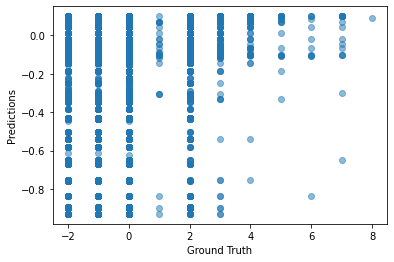

In [80]:
plt.scatter(y, predictions, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [81]:
corrMat = rawData.corr()
print(corrMat)

            Unnamed: 0        ID  LIMIT_BAL       SEX  EDUCATION  MARRIAGE  \
Unnamed: 0    1.000000  1.000000   0.026179  0.018498   0.013198 -0.029080   
ID            1.000000  1.000000   0.026179  0.018497   0.013198 -0.029079   
LIMIT_BAL     0.026179  0.026179   1.000000  0.024755  -0.245297 -0.108139   
SEX           0.018498  0.018497   0.024755  1.000000   0.008144 -0.031389   
EDUCATION     0.013198  0.013198  -0.245297  0.008144   1.000000 -0.146705   
MARRIAGE     -0.029080 -0.029079  -0.108139 -0.031389  -0.146705  1.000000   
AGE           0.018678  0.018678   0.144713 -0.090874   0.180332 -0.414170   
PAY_0        -0.030575 -0.030575  -0.271214 -0.057643   0.132036  0.019917   
PAY_2        -0.011215 -0.011215  -0.296382 -0.070771   0.155089  0.024199   
PAY_3        -0.018494 -0.018494  -0.286123 -0.066096   0.148547  0.032688   
PAY_4        -0.002735 -0.002735  -0.267460 -0.060173   0.140184  0.033122   
PAY_5        -0.022199 -0.022199  -0.249411 -0.055064   0.125987

<AxesSubplot:>

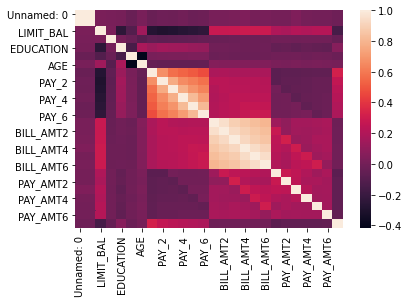

In [82]:
sns.heatmap(corrMat)

In [83]:
rawData1 = rawData[['LIMIT_BAL','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]


<AxesSubplot:xlabel='PAY_0', ylabel='LIMIT_BAL'>

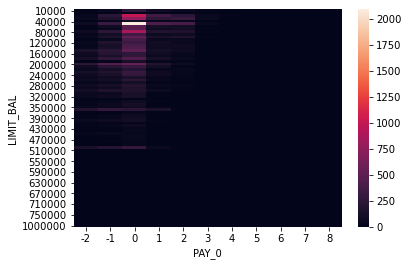

In [84]:
Pay = rawData1.groupby('LIMIT_BAL').PAY_0.value_counts().unstack().fillna(0)
sns.heatmap(Pay)

